In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data

In [23]:
iris = sns.load_dataset('iris')

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


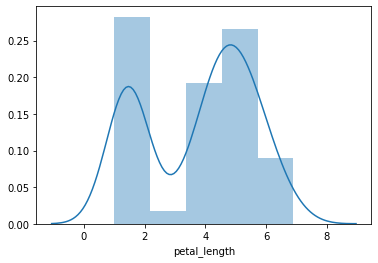

In [25]:
sns.distplot(iris.petal_length)

Text(1.5, 2, 'r = 0.96')

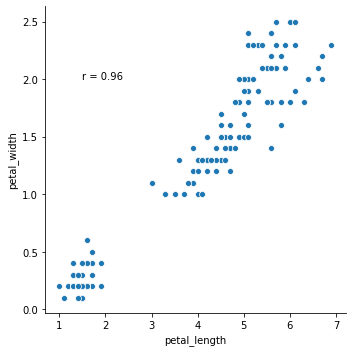

In [26]:
sns.relplot(data=iris, x='petal_length', y='petal_width')
r = iris.corr().loc['petal_length', 'petal_width']
plt.text(1.5, 2, f'r = {r:.2}')

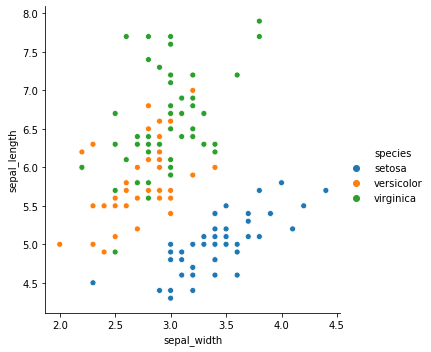

In [27]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

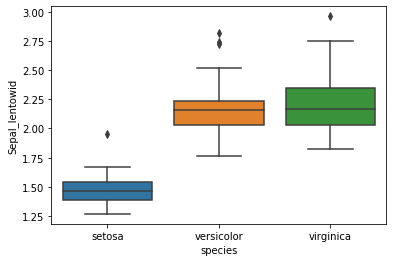

In [28]:
iris['Sepal_lentowid'] = iris['sepal_length']/iris['sepal_width']

sns.boxplot(data = iris, x = 'species', y = 'Sepal_lentowid')

In [29]:

anscombe = sns.load_dataset('anscombe')

anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

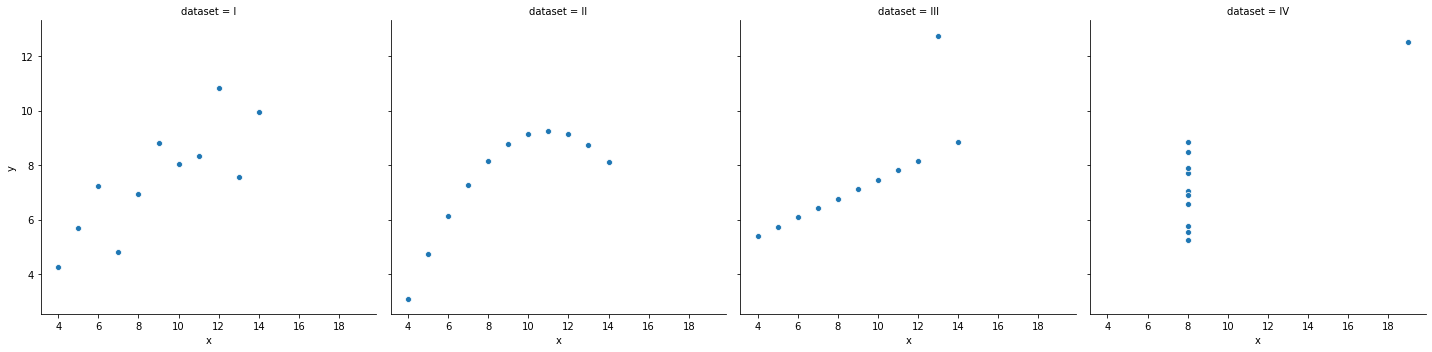

In [30]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')

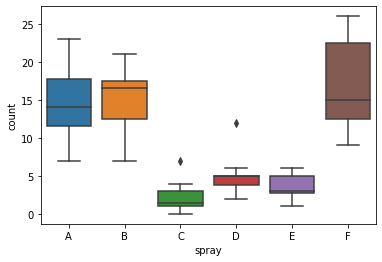

In [32]:
sprays = data('InsectSprays')
sns.boxplot(data=sprays, y='count', x='spray')

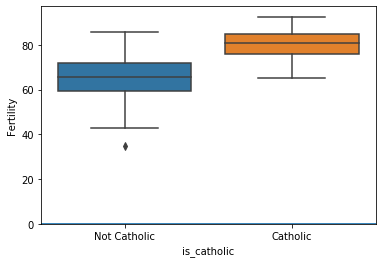

In [31]:
swiss = data('swiss')

sns.distplot(swiss.Catholic, bins=10)

swiss['is_catholic'] = swiss.Catholic.apply(lambda n: 'Catholic' if n > 70 else 'Not Catholic')

sns.boxplot(data=swiss, y='Fertility', x='is_catholic')

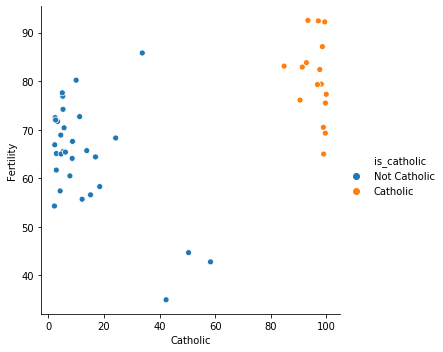

In [33]:
sns.relplot(data=swiss, x='Catholic', y='Fertility', hue='is_catholic')

In [34]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

In [36]:
import env

def get_db_url(db):
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'

In [38]:
query = 'SELECT * FROM orders'
url = get_db_url('chipotle')
orders = pd.read_sql(query, url).set_index('id')
orders.head()


,order_id,quantity,item_name,choice_description,item_price
id,,,,,
1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
2,1,1,Izze,[Clementine],$3.39
3,1,1,Nantucket Nectar,[Apple],$3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [39]:
orders.item_price = orders.item_price.str.replace('$', '').astype('float')

In [40]:
four_most_popular = (orders.groupby('item_name')
 .sum()
 .drop(columns='order_id')
 .rename(columns={'quantity': 'units_sold', 'item_price': 'revenue'})
 .sort_values(by='units_sold', ascending=False)
 .head(4)
 .reset_index()
)

four_most_popular

,item_name,units_sold,revenue
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


In [41]:
item_sums = orders.groupby('item_name').sum()
item_sums.drop(columns='order_id', inplace=True)
item_sums.rename(columns={'quantity': 'units_sold', 'item_price': 'revenue'}, inplace=True)
sorted_item_sums = item_sums.sort_values(by='units_sold', ascending=False)
top_four_items = sorted_item_sums.head(4)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text xticklabel objects>)

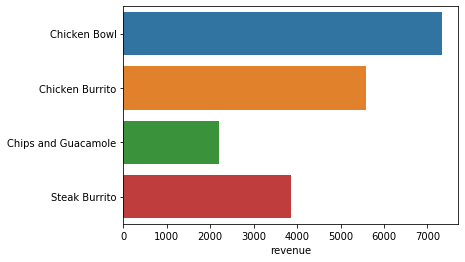

In [42]:
sns.barplot(data=four_most_popular, y='item_name', x='revenue')
plt.ylabel('')
plt.xticks()

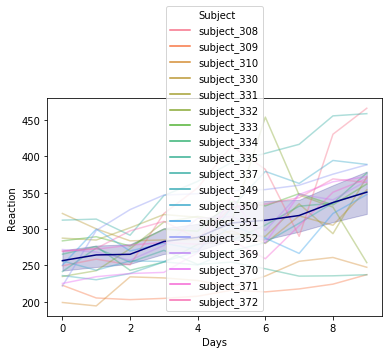

In [43]:
sleep = data('sleepstudy')

sleep.Subject = 'subject_' + sleep.Subject.astype(str)

sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

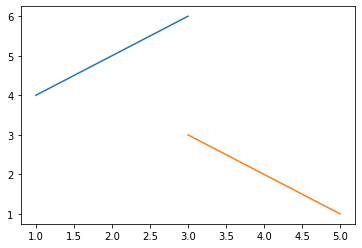

In [44]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.plot([3, 4, 5], [3, 2, 1])